In [33]:
%run ./ml_model_init.ipynb

## Baseline Model


In [34]:
# Split the gk data into train and test sets
gk_splits = split_data(gk_player_data)

#### Linear Model


In [35]:

base_gk_lin_reg = Linear_regression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'])
print(base_gk_lin_reg)
# Store the model evaluation details in a DataFrame
gk_evaluation_stats = pd.DataFrame({"base_gk_lin_reg": [base_gk_lin_reg['train_MAE'], base_gk_lin_reg['test_MAE'], base_gk_lin_reg['train_RMSE'], base_gk_lin_reg['test_RMSE'], base_gk_lin_reg['cv_rmse'], base_gk_lin_reg['R2_train'], base_gk_lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

gk_evaluation_stats

Training set RMSE: 2.2773537013618785
Test set RMSE: 2.3083048986713046
Training set R2: 0.042603526186075436
Test set R2: -0.12277800767074809
{'train_MAE': 1.9124436869644832, 'test_MAE': 2.0017303380679206, 'train_MSE': 5.1863398811066475, 'test_MSE': 5.328271505229941, 'train_RMSE': 2.2773537013618785, 'test_RMSE': 2.3083048986713046, 'cv_rmse': 2.3378461143345994, 'R2_train': 0.042603526186075436, 'R2_test': -0.12277800767074809}


,base_gk_lin_reg
train_MAE,1.912444
test_MAE,2.001730
train_RMSE,2.277354
test_RMSE,2.308305
cv_rmse,2.337846
R2_train,0.042604
R2_test,-0.122778


#### DecisionTree Model


In [36]:
base_gk_dt_reg = DecisionTreeRegression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_dt_reg = [base_gk_dt_reg['train_MAE'], base_gk_dt_reg['test_MAE'], base_gk_dt_reg['train_RMSE'], base_gk_dt_reg['test_RMSE'], base_gk_dt_reg['cv_rmse'], base_gk_dt_reg['R2_train'], base_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg
train_MAE,1.912444,0.000959
test_MAE,2.001730,2.337165
train_RMSE,2.277354,0.021895
test_RMSE,2.308305,3.125718
cv_rmse,2.337846,3.432762
R2_train,0.042604,0.999912
R2_test,-0.122778,-1.058767


#### RandomForest Model


In [37]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_gk_rf_reg = RandomForestRegression(gk_splits['feature_train'], gk_splits['features_test'],
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_rf_reg = [base_gk_rf_reg['train_MAE'], base_gk_rf_reg['test_MAE'], base_gk_rf_reg['train_RMSE'], base_gk_rf_reg['test_RMSE'], base_gk_rf_reg['cv_rmse'], base_gk_rf_reg['R2_train'], base_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg
train_MAE,1.912444,0.000959,1.490871
test_MAE,2.001730,2.337165,2.004212
train_RMSE,2.277354,0.021895,1.788955
test_RMSE,2.308305,3.125718,2.303572
cv_rmse,2.337846,3.432762,2.371025
R2_train,0.042604,0.999912,0.409215
R2_test,-0.122778,-1.058767,-0.118178


#### XgBoost Model


In [38]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_gk_xgb_reg = XGBoostRegression(gk_splits['feature_train'], gk_splits['features_test'], gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(base_gk_xgb_reg = [base_gk_xgb_reg['train_MAE'], base_gk_xgb_reg['test_MAE'], base_gk_xgb_reg['train_RMSE'], base_gk_xgb_reg['test_RMSE'], base_gk_xgb_reg['cv_rmse'], base_gk_xgb_reg['R2_train'], base_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg
train_MAE,1.912444,0.000959,1.490871,1.712817
test_MAE,2.001730,2.337165,2.004212,1.972115
train_RMSE,2.277354,0.021895,1.788955,2.047294
test_RMSE,2.308305,3.125718,2.303572,2.268157
cv_rmse,2.337846,3.432762,2.371025,2.353233
R2_train,0.042604,0.999912,0.409215,0.226266
R2_test,-0.122778,-1.058767,-0.118178,-0.084061


# Feature engineering


## Goalkeepers


### VarianceThreshold


In [39]:
VT_scaler = StandardScaler()
VT_scaler.fit(gk_splits['feature_train'])
df_gk_train_scaled = pd.DataFrame(VT_scaler.fit_transform(gk_splits['feature_train']), columns=gk_splits['feature_train'].columns)
df_gk_test_scaled = pd.DataFrame(VT_scaler.transform(gk_splits['features_test']), columns=gk_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_gk_train_scaled)

gk_threshold_columns = df_gk_train_scaled.columns[selector.get_support()]

gk_threshold_train = df_gk_train_scaled[gk_threshold_columns]
gk_threshold_test = df_gk_test_scaled[gk_threshold_columns]

gk_threshold_train.shape, gk_threshold_test.shape

((1043, 25), (261, 25))

#### Model(VT)


##### Linear Model


In [40]:

VarT_gk_lin_reg = Linear_regression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_lin_reg =  [VarT_gk_lin_reg['train_MAE'], VarT_gk_lin_reg['test_MAE'], VarT_gk_lin_reg['train_RMSE'], VarT_gk_lin_reg['test_RMSE'], VarT_gk_lin_reg['cv_rmse'], VarT_gk_lin_reg['R2_train'], VarT_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 2.2773537013618785
Test set RMSE: 2.3083048986712993
Training set R2: 0.042603526186075436
Test set R2: -0.12277800767074298


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778


##### DecisionTree Model


In [41]:
VarT_gk_dt_reg = DecisionTreeRegression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_dt_reg = [VarT_gk_dt_reg['train_MAE'], VarT_gk_dt_reg['test_MAE'], VarT_gk_dt_reg['train_RMSE'], VarT_gk_dt_reg['test_RMSE'], VarT_gk_dt_reg['cv_rmse'], VarT_gk_dt_reg['R2_train'], VarT_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893


##### RandomForest Model


In [42]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_gk_rf_reg = RandomForestRegression(gk_threshold_train, gk_threshold_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_rf_reg = [VarT_gk_rf_reg['train_MAE'], VarT_gk_rf_reg['test_MAE'], VarT_gk_rf_reg['train_RMSE'], VarT_gk_rf_reg['test_RMSE'], VarT_gk_rf_reg['cv_rmse'], VarT_gk_rf_reg['R2_train'], VarT_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959,1.490474
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958,2.000623
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895,1.788856
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070,2.299427
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550,2.370935
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912,0.409280
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893,-0.114158


##### XgBoost Model


In [43]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_gk_xgb_reg = XGBoostRegression(gk_threshold_train, gk_threshold_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(VarT_gk_xgb_reg = [VarT_gk_xgb_reg['train_MAE'], VarT_gk_xgb_reg['test_MAE'], VarT_gk_xgb_reg['train_RMSE'], VarT_gk_xgb_reg['test_RMSE'], VarT_gk_xgb_reg['cv_rmse'], VarT_gk_xgb_reg['R2_train'], VarT_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959,1.490474,1.712817
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958,2.000623,1.972115
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895,1.788856,2.047294
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070,2.299427,2.268157
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550,2.370935,2.353233
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912,0.409280,0.226266
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893,-0.114158,-0.084061


### Feature selection techniques


#### K-best features


In [44]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, gk_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(gk_threshold_train, gk_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, gk_splits['target_train'])

  k_sel_cols = gk_threshold_train.columns[selector.get_support()]
  k_sel_X_test = gk_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, gk_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[-0.026, -0.026, -0.068, -0.091, -0.116, -0.121, -0.076, -0.072, -0.091, -0.092, -0.099, -0.125, -0.077, -0.097, -0.102, -0.087, -0.087, -0.109, -0.068, -0.068, -0.093, -0.125, -0.075, -0.069] 0


In [45]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(gk_threshold_train, gk_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = gk_threshold_train[sel_feats]
k_sel_X_test = gk_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [46]:

KBest_gk_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_lin_reg =  [KBest_gk_lin_reg['train_MAE'], KBest_gk_lin_reg['test_MAE'], KBest_gk_lin_reg['train_RMSE'], KBest_gk_lin_reg['test_RMSE'], KBest_gk_lin_reg['cv_rmse'], KBest_gk_lin_reg['R2_train'], KBest_gk_lin_reg['R2_test']])

gk_evaluation_stats

Training set RMSE: 2.3274151089591593
Test set RMSE: 2.203359640871922
Training set R2: 4.939417203986274e-05
Test set R2: -0.023006354063185963


,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959,1.490474,1.712817,1.969687
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958,2.000623,1.972115,1.933208
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895,1.788856,2.047294,2.327415
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070,2.299427,2.268157,2.203360
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550,2.370935,2.353233,2.329176
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912,0.409280,0.226266,0.000049
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893,-0.114158,-0.084061,-0.023006


###### DecisionTree Model


In [47]:
KBest_gk_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_dt_reg = [KBest_gk_dt_reg['train_MAE'], KBest_gk_dt_reg['test_MAE'], KBest_gk_dt_reg['train_RMSE'], KBest_gk_dt_reg['test_RMSE'], KBest_gk_dt_reg['cv_rmse'], KBest_gk_dt_reg['R2_train'], KBest_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959,1.490474,1.712817,1.969687,1.967850
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958,2.000623,1.972115,1.933208,1.931215
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895,1.788856,2.047294,2.327415,2.325599
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070,2.299427,2.268157,2.203360,2.207496
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550,2.370935,2.353233,2.329176,2.328892
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912,0.409280,0.226266,0.000049,0.001609
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893,-0.114158,-0.084061,-0.023006,-0.026851


###### RandomForest Model


In [48]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_gk_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_rf_reg = [KBest_gk_rf_reg['train_MAE'], KBest_gk_rf_reg['test_MAE'], KBest_gk_rf_reg['train_RMSE'], KBest_gk_rf_reg['test_RMSE'], KBest_gk_rf_reg['cv_rmse'], KBest_gk_rf_reg['R2_train'], KBest_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959,1.490474,1.712817,1.969687,1.967850,1.966667
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958,2.000623,1.972115,1.933208,1.931215,1.929574
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895,1.788856,2.047294,2.327415,2.325599,2.325669
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070,2.299427,2.268157,2.203360,2.207496,2.207251
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550,2.370935,2.353233,2.329176,2.328892,2.328873
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912,0.409280,0.226266,0.000049,0.001609,0.001549
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893,-0.114158,-0.084061,-0.023006,-0.026851,-0.026623


###### XgBoost Model


In [49]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_gk_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(KBest_gk_xgb_reg = [KBest_gk_xgb_reg['train_MAE'], KBest_gk_xgb_reg['test_MAE'], KBest_gk_xgb_reg['train_RMSE'], KBest_gk_xgb_reg['test_RMSE'], KBest_gk_xgb_reg['cv_rmse'], KBest_gk_xgb_reg['R2_train'], KBest_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg
train_MAE,1.912444,0.000959,1.490871,1.712817,1.912444,0.000959,1.490474,1.712817,1.969687,1.967850,1.966667,1.967765
test_MAE,2.001730,2.337165,2.004212,1.972115,2.001730,2.250958,2.000623,1.972115,1.933208,1.931215,1.929574,1.931157
train_RMSE,2.277354,0.021895,1.788955,2.047294,2.277354,0.021895,1.788856,2.047294,2.327415,2.325599,2.325669,2.325605
test_RMSE,2.308305,3.125718,2.303572,2.268157,2.308305,3.052070,2.299427,2.268157,2.203360,2.207496,2.207251,2.206991
cv_rmse,2.337846,3.432762,2.371025,2.353233,2.337846,3.354550,2.370935,2.353233,2.329176,2.328892,2.328873,2.328699
R2_train,0.042604,0.999912,0.409215,0.226266,0.042604,0.999912,0.409280,0.226266,0.000049,0.001609,0.001549,0.001604
R2_test,-0.122778,-1.058767,-0.118178,-0.084061,-0.122778,-0.962893,-0.114158,-0.084061,-0.023006,-0.026851,-0.026623,-0.026381


#### Mutual Information


In [50]:
from sklearn.feature_selection import mutual_info_regression
# gk_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, gk_splits['target_train'])
mutual_info

array([0])

In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

clean_sheets_3    0
dtype: int32

<Axes: >

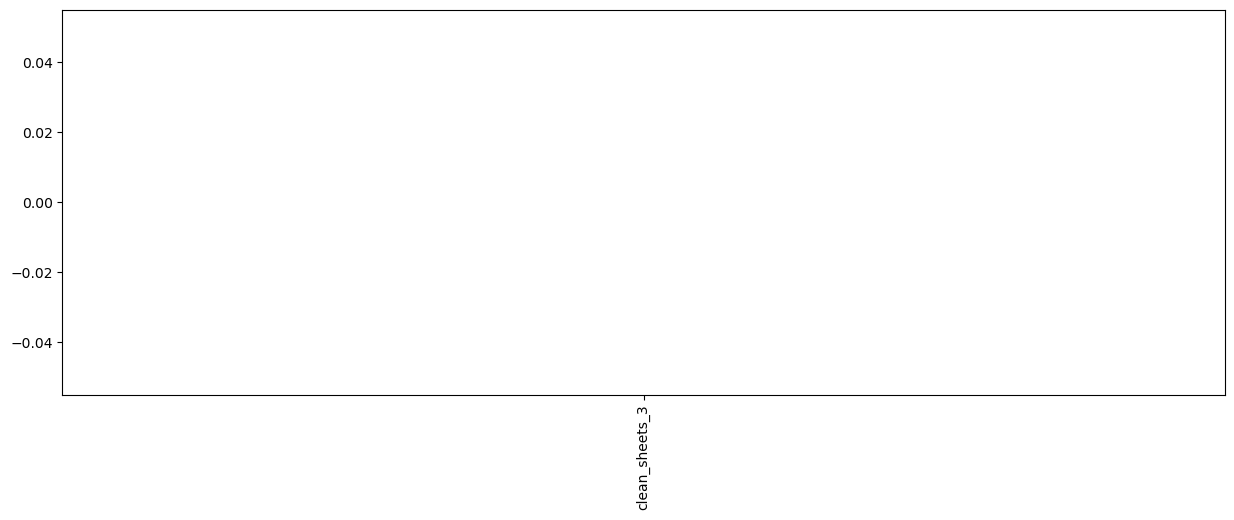

In [52]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [53]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, gk_splits['target_train'])

selected_top_columns.get_support()

array([False])

In [54]:
gk_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

gk_20_train = k_sel_X_train[gk_20_columns]
gk_20_test = k_sel_X_test[gk_20_columns]


In [55]:
gk_20_train.shape, gk_20_test.shape

((1043, 0), (261, 0))

##### Model (MI)


###### Linear Model


In [56]:

MI_gk_lin_reg = Linear_regression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_lin_reg =  [MI_gk_lin_reg['train_MAE'], MI_gk_lin_reg['test_MAE'], MI_gk_lin_reg['train_RMSE'], MI_gk_lin_reg['test_RMSE'], MI_gk_lin_reg['cv_rmse'], MI_gk_lin_reg['R2_train'], MI_gk_lin_reg['R2_test']])

gk_evaluation_stats

ValueError: at least one array or dtype is required

###### DecisionTree Model


In [ ]:
MI_gk_dt_reg = DecisionTreeRegression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'])

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_dt_reg = [MI_gk_dt_reg['train_MAE'], MI_gk_dt_reg['test_MAE'], MI_gk_dt_reg['train_RMSE'], MI_gk_dt_reg['test_RMSE'], MI_gk_dt_reg['cv_rmse'], MI_gk_dt_reg['R2_train'], MI_gk_dt_reg['R2_test']])

gk_evaluation_stats



,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209


###### RandomForest Model


In [ ]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_gk_rf_reg = RandomForestRegression(gk_20_train, gk_20_test,
                               gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_rf_reg = [MI_gk_rf_reg['train_MAE'], MI_gk_rf_reg['test_MAE'], MI_gk_rf_reg['train_RMSE'], MI_gk_rf_reg['test_RMSE'], MI_gk_rf_reg['cv_rmse'], MI_gk_rf_reg['R2_train'], MI_gk_rf_reg['R2_test']])

gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495,0.520959
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737,0.708447
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848,0.751205
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541,1.079904
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489,0.881781
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278,0.889379
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209,0.819444


###### XgBoost Model


In [ ]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_gk_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(MI_gk_xgb_reg = [MI_gk_xgb_reg['train_MAE'], MI_gk_xgb_reg['test_MAE'], MI_gk_xgb_reg['train_RMSE'], MI_gk_xgb_reg['test_RMSE'], MI_gk_xgb_reg['cv_rmse'], MI_gk_xgb_reg['R2_train'], MI_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg,MI_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495,0.520959,0.499635
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737,0.708447,0.649413
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848,0.751205,0.690470
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541,1.079904,0.991697
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489,0.881781,0.822544
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278,0.889379,0.906543
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209,0.819444,0.847735


# Best Stats


In [ ]:
gk_evaluation_stats

,base_gk_lin_reg,base_gk_dt_reg,base_gk_rf_reg,base_gk_xgb_reg,VarT_gk_lin_reg,VarT_gk_dt_reg,VarT_gk_rf_reg,VarT_gk_xgb_reg,KBest_gk_lin_reg,KBest_gk_dt_reg,KBest_gk_rf_reg,KBest_gk_xgb_reg,MI_gk_lin_reg,MI_gk_dt_reg,MI_gk_rf_reg,MI_gk_xgb_reg
train_MAE,0.537948,1.215244e-16,0.343052,0.466298,0.537948,1.425286e-16,0.345427,0.466298,0.561994,2.400482e-17,0.369878,0.499635,0.594601,0.502495,0.520959,0.499635
test_MAE,0.623007,6.846847e-01,0.573287,0.622029,0.623007,6.621622e-01,0.578852,0.622029,0.642537,6.891892e-01,0.603757,0.649413,0.685047,0.721737,0.708447,0.649413
train_RMSE,0.805790,3.150776e-16,0.498670,0.664465,0.805790,4.605380e-16,0.499200,0.664465,0.831086,1.382016e-16,0.517524,0.690470,0.867196,0.737848,0.751205,0.690470
test_RMSE,0.987276,1.287501e+00,0.902022,0.962114,0.987276,1.224745e+00,0.912175,0.962114,0.969742,1.246617e+00,0.910841,0.991697,1.032917,1.124541,1.079904,0.991697
cv_rmse,0.813501,1.110937e+00,0.801554,0.790302,0.813857,1.058092e+00,0.797694,0.790302,0.827669,1.133797e+00,0.839398,0.822544,0.862790,0.937489,0.881781,0.822544
R2_train,0.872718,1.000000e+00,0.951253,0.913450,0.872718,1.000000e+00,0.951149,0.913450,0.864601,1.000000e+00,0.947497,0.906543,0.852580,0.893278,0.889379,0.906543
R2_test,0.849089,7.433526e-01,0.874027,0.856684,0.849089,7.677620e-01,0.871176,0.856684,0.854402,7.593931e-01,0.871552,0.847735,0.834814,0.804209,0.819444,0.847735


In [ ]:
# - BASE:  rf


## Fine tuning the models


In [ ]:
model = RandomForestRegressor()

param_grid = {'n_estimators': [8, 10, 12, 14, 16, 18, 20]}

# Define the possible values of the hyperparameter
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state': [18]
}

In [ ]:
gk_search = GridSearchCV(model, grid, cv=5,
                              scoring='neg_root_mean_squared_error').fit(
    gk_threshold_train, gk_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

In [ ]:
print("The best midfielder hyperparameters are ", gk_search.best_params_)

The best midfielder hyperparameters are  {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 18}
